Train the model on IBM

Team Id : PNT2022TMID18280

Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy
from keras.datasets import mnist
from matplotlib import pyplot
import cv2
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from tensorflow.keras.utils import to_categorical

Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Analyse the data

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[3]

1

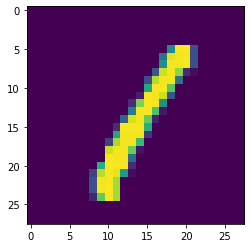

In [6]:
plt.imshow(X_train[3])

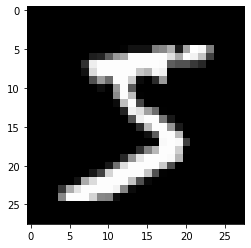

In [7]:
plt.imshow(X_train[0], cmap="gray")

In [8]:
plt.show()

In [9]:
print (y_train[0])

5


In [10]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


Data Preprocessing

In [11]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [12]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [13]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Create the model

In [14]:
model = Sequential()

In [15]:
## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

In [16]:
## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

Compile the model

In [17]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 52s 25ms/step - loss: 0.8929 - accuracy: 0.7657 - val_loss: 0.1195 - val_accuracy: 0.9643
Epoch 2/3
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3008 - accuracy: 0.9097 - val_loss: 0.0781 - val_accuracy: 0.9752
Epoch 3/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2268 - accuracy: 0.9324 - val_loss: 0.0658 - val_accuracy: 0.9811


Test the model

In [20]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.0658024251461029, 0.9811000227928162]


In [21]:
prediction = model.predict(X_test[:6])
print(prediction)

1/1 [==============================] - 3s 3s/step
[[3.55495244e-10 7.29466140e-11 1.24382682e-08 3.12972510e-08
  1.00849946e-10 7.78483007e-12 2.98943576e-16 1.00000000e+00
  1.04550403e-10 2.65351492e-08]
 [9.57870452e-06 4.10244611e-05 9.99915242e-01 1.52442669e-06
  7.03911907e-09 1.15646394e-07 2.86048053e-05 2.52811992e-06
  1.39857377e-06 2.90189273e-09]
 [4.81550089e-08 9.99988675e-01 4.31210719e-06 1.94846739e-09
  3.75324106e-07 1.10024754e-08 2.42053318e-07 2.55221130e-06
  3.75323953e-06 6.28379393e-09]
 [9.99998569e-01 4.15480497e-11 3.98887394e-08 2.21658924e-11
  4.12422818e-10 2.37271258e-10 1.25998326e-06 2.59341104e-09
  2.61177426e-08 6.51183498e-08]
 [2.20968646e-10 8.36481107e-09 1.63457178e-10 2.96279038e-15
  9.99999523e-01 7.63032053e-13 1.30090081e-08 3.53200351e-11
  2.59480881e-09 5.02546015e-07]
 [2.77151635e-09 9.99999523e-01 4.06674445e-08 1.98911252e-11
  1.27310244e-07 2.89506336e-11 1.75979553e-09 1.92648784e-07
  1.37749879e-07 6.30462849e-10]]
